In [2]:
!pip install diffusers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 35.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [ ]:
!pip install -U peft transformers
# You might need to restart the session to avoid bugs

In [1]:
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt

Load the public Stable Diffusion XL pipeline and the LoRa weights I trained

In [2]:
import torch
from diffusers import DiffusionPipeline, AutoencoderKL

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)
pipe.load_lora_weights("maxkochanoff/sdxl_lora_for_portraits")
_ = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

I add "in the style of TOK" to all provided prompts to trigger the right generation

In [70]:
def preprocess_prompt(prompt: str):
    return f"{prompt} in the style of TOK"

# Inference! 🚀🚀🚀

In [127]:
num_images = 4
prompts = ['a girl', 'a boy', 'a girl and a boy',
           'a girl with dark hair', 'a man with a dog'
           ]

generator = torch.Generator().manual_seed(2024)

def inference(prompt: str):
  prompt_proccessed = preprocess_prompt(prompt)
  prompts_proccessed = [prompt_proccessed] * num_images

  images = pipe(prompts_proccessed,
                generator=generator,
                num_inference_steps=50).images

  fig, axes = plt.subplots(1, num_images, figsize=(20, 6))

  for i, image in enumerate(images):
      axes[i].imshow(image)
      axes[i].axis('off')
  plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

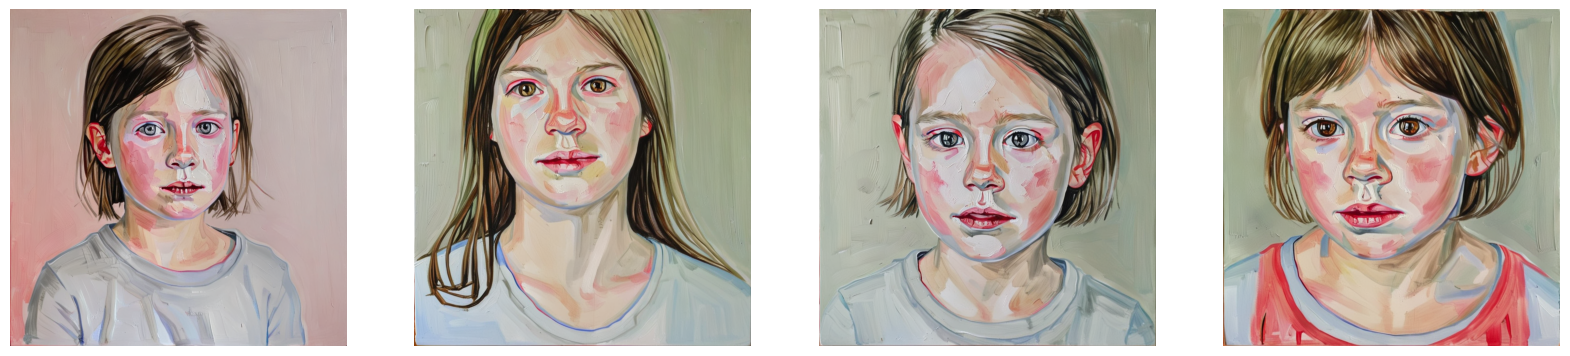

In [118]:
inference('a girl')

  0%|          | 0/50 [00:00<?, ?it/s]

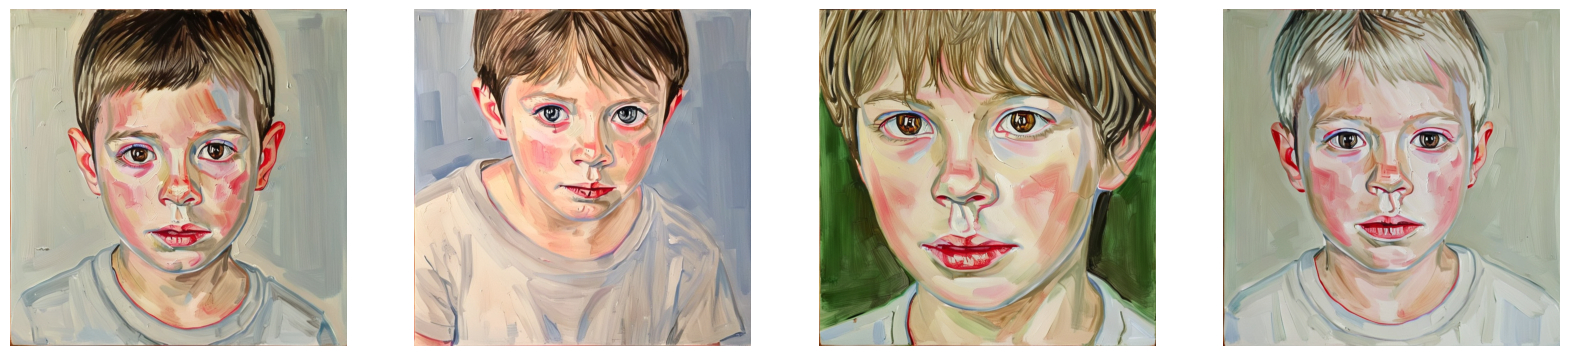

In [117]:
inference('a boy')

  0%|          | 0/50 [00:00<?, ?it/s]

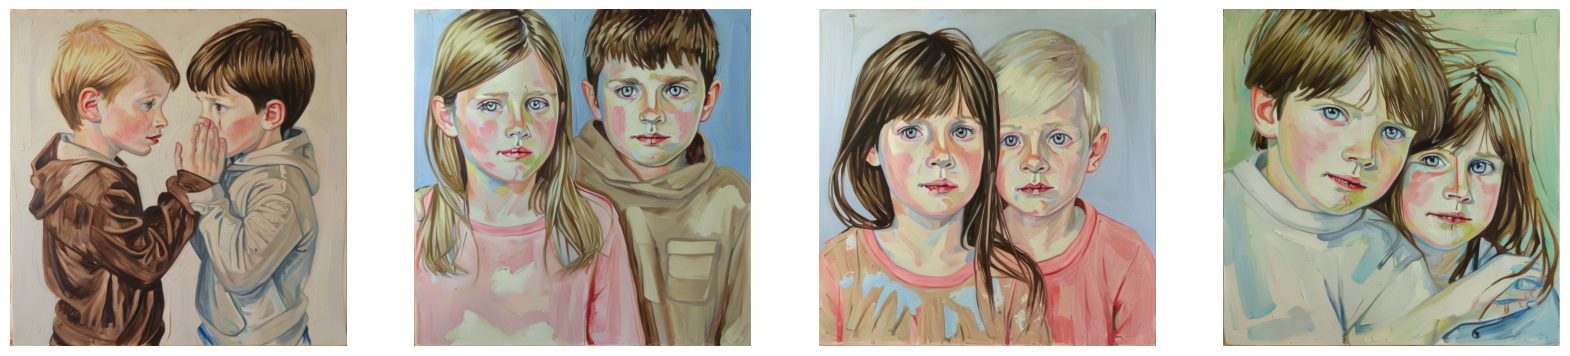

In [124]:
inference('a girl and a boy')

  0%|          | 0/50 [00:00<?, ?it/s]

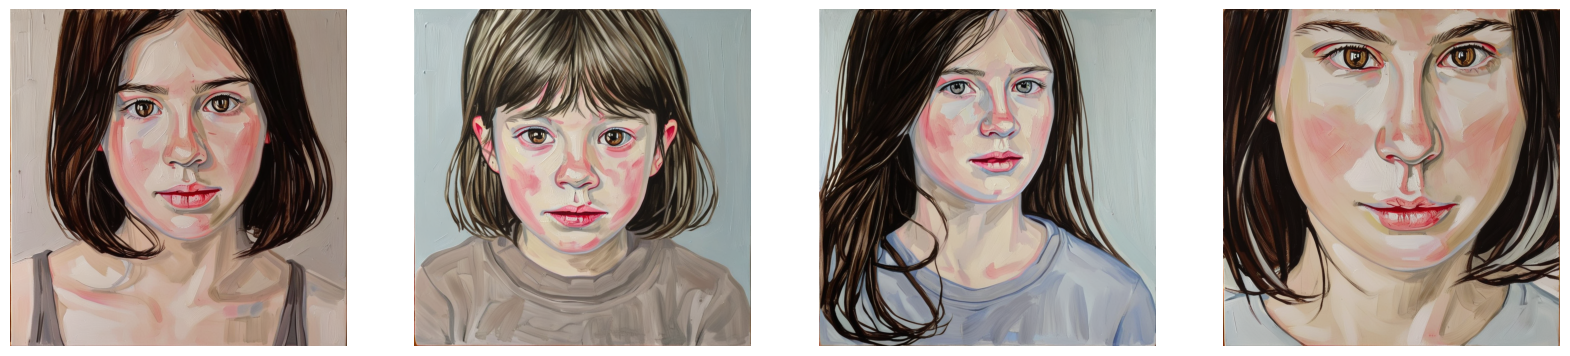

In [122]:
inference('a girl with dark hair')

  0%|          | 0/50 [00:00<?, ?it/s]

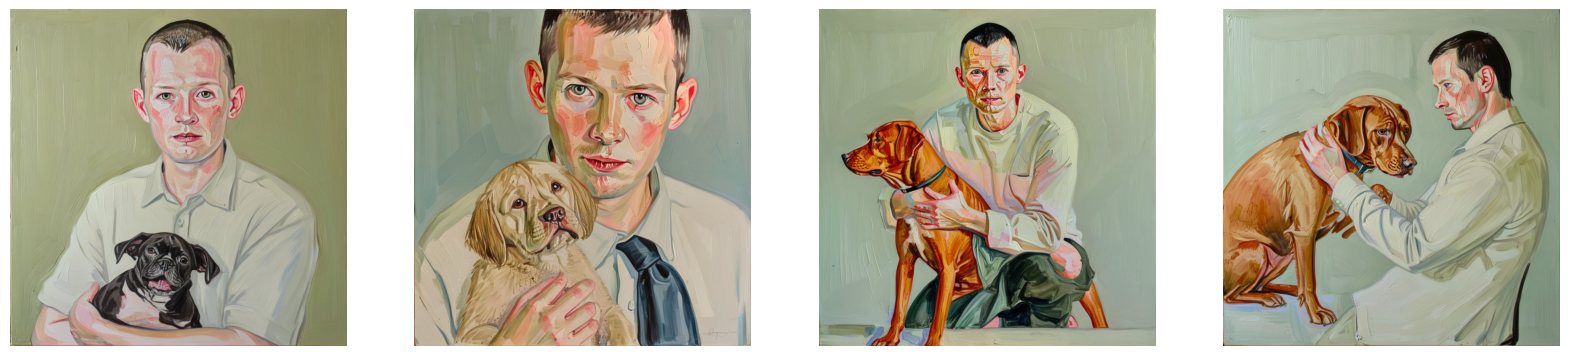

In [114]:
inference('a man with a dog')